In [81]:
import requests
from PIL import Image
from io import BytesIO

URL_GEOCODE = "http://api.map.baidu.com/geocoder/v2/"
URL_GETMAP = "http://api.map.baidu.com/staticimage/v2"
URL_IP = "http://api.map.baidu.com/location/ip"
URL_CONVERT = "http://api.map.baidu.com/geoconv/v1/"

class baidumapapi(object):
    def __init__(self, token):
        self.token = token

    def getCoordinate(self, address, output="json", ret_coordtype="bd09ll"):
        res = requests.get(URL_GEOCODE, params={
            "ak":self.token,
            "address":address,
            "output":output,
            "ret_coordtype":ret_coordtype
        })
        return res.json()["result"]

    def getAddress(self, location, coordtype="bd09ll",
                   output="json", ret_coordtype="bd09ll"):
        res = requests.get(URL_GEOCODE, params={
            "ak":self.token,
            "location":location,
            "coordtype":coordtype,
            "output":output,
            "ret_coordtype":ret_coordtype
        })
        return res.json()["result"]

    def getMap(self, center, file="example.png", width="512", height="512",
               zoom="11", coordtype="bd09ll"):
        res = requests.get(URL_GETMAP, params={
            "ak":self.token,
            "center":center,
            "width":width,
            "height":height,
            "zoom":zoom,
            "coordtype":coordtype
        })
        im = Image.open(BytesIO(res.content))
        im.save(file, "png")

    def ip(self, ip, coor="BD09ll"):
        res = requests.get(URL_IP, params={
            "ak":self.token,
            "ip":ip,
            "coor":coor
        })
        return res.json()

    def convert(self):
        pass

In [82]:
baidumap = baidumapapi("6Bp5GwZV2mHIoAOabZFDIstMLBHFRBN6")


In [75]:
baidumap.getCoordinate("山东省莱西市威海东路永兴街")

{'confidence': 30,
 'level': '道路',
 'location': {'lat': 36.869581983131766, 'lng': 120.54267640238868},
 'precise': 0}

In [76]:
baidumap.getAddress("36.869581983131766,120.54267640238868")

{'addressComponent': {'adcode': '370285',
  'city': '青岛市',
  'city_level': 2,
  'country': '中国',
  'country_code': 0,
  'country_code_iso': 'CHN',
  'country_code_iso2': 'CN',
  'direction': '附近',
  'distance': '29',
  'district': '莱西市',
  'province': '山东省',
  'street': '威海东路',
  'street_number': '49号-甲',
  'town': ''},
 'business': '水集',
 'cityCode': 236,
 'formatted_address': '山东省青岛市莱西市威海东路49号-甲',
 'location': {'lat': 36.869581911870036, 'lng': 120.54267640238861},
 'poiRegions': [],
 'pois': [],
 'roads': [],
 'sematic_description': '莱西市月湖医院(威海东路)附近37米'}

In [77]:
baidumap.getMap("北京")

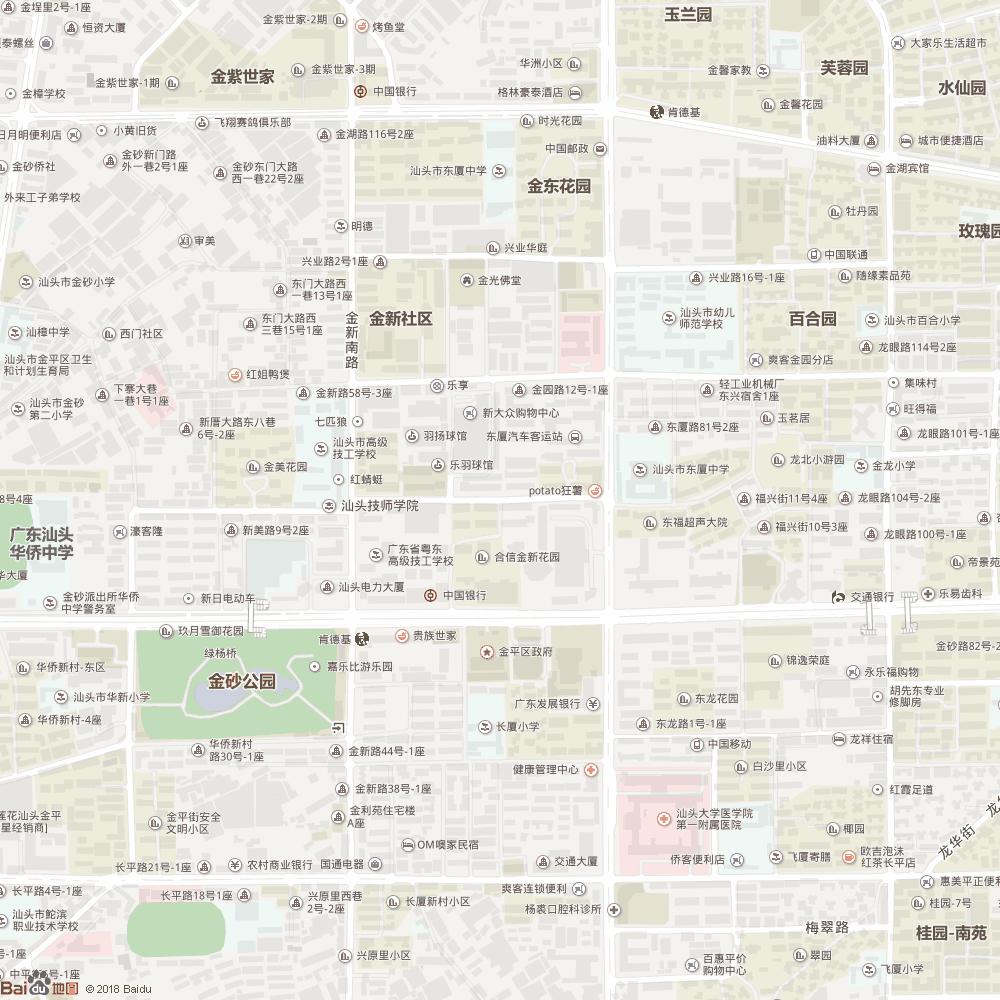

In [79]:
res = requests.get(URL_GETMAP, params={
            "ak":"6Bp5GwZV2mHIoAOabZFDIstMLBHFRBN6",
            "center":"汕头新厦路",
            "width":1000,
            "height":1000,
            "zoom":17,
     })
Image.open(BytesIO(res.content))

In [48]:
res.url

'http://api.map.baidu.com/staticimage/v2?ak=6Bp5GwZV2mHIoAOabZFDIstMLBHFRBN6&center=%E6%B1%95%E5%A4%B4%E6%96%B0%E5%8E%A6%E8%B7%AF&width=1000&height=1000&zoom=17'

In [84]:
baidumap.ip("58.35.107.215","GCJ02")

{'address': 'CN|上海|上海|None|CHINANET|0|0',
 'content': {'address': '上海市',
  'address_detail': {'city': '上海市',
   'city_code': 289,
   'district': '',
   'province': '上海市',
   'street': '',
   'street_number': ''},
  'point': {'x': '13524118.26', 'y': '3642780.37'}},
 'status': 0}

In [2]:
import pandas as pd 
import requests
from bs4 import BeautifulSoup as bs
fund_list = pd.read_csv("e:/wenpeiyu/pythonproject/lianjiaspider/fundlist.csv")
fundcompany =  "http://fund.cmbchina.com/FundPages/OpenFund/OpenFundDetail.aspx?Channel=Company&FundID={id_}"
fundoverview = "http://fund.cmbchina.com/FundPages/OpenFund/OpenFundDetail.aspx?Channel=Overview&FundID={id_}"
fund = "http://fund.cmbchina.com/FundPages/OpenFund/OpenFundDetail.aspx?&FundID={id_}"
funddetail = "http://live.cmbchina.com/FundHtmlBin/Html/{id_}.htm"
temp = pd.DataFrame()
for i in range(10):
    id_ = "%06d" %fund_list.iloc[i,0]
    company = fundcompany.format(id_=id_)
    overview = fundoverview.format(id_=id_)
    fund = fund.format(id_=id_)
    overviewinfo = pd.read_html(overview,encoding='utf-8')[0]
    overviewinfo = overviewinfo.transpose()
    mapping = {i[0]:i[1] for i  in zip(range(20), list(overviewinfo.iloc[0,:]))}
    overviewinfo = overviewinfo.rename(columns = mapping ).drop(0)
    a = requests.get(funddetail.format(id_=id_))
    a.apparent_encoding
    a.encoding ='GB2312'
    res = bs(a.text,"lxml")
    a = res.find_all("div", class_="content_Row")
    if a == []:
        temp = pd.concat([temp, overviewinfo])
    else:
        jijinjingli = a[3].find("a").string
        overviewinfo["基金经理"] = jijinjingli
        rengoufeilv = a[5].string.strip()
        overviewinfo["认购费率"] = rengoufeilv
        shengoufeilv = a[6].string.strip()
        overviewinfo["申购费率"] = shengoufeilv
        shuhuifeilv  = a[7].string.strip()
        overviewinfo["赎回费率"] = shuhuifeilv
        touzimubiao = a[8].string.strip()
        overviewinfo["投资目标"] = touzimubiao
        dangqianjingzhi = a[9].find_all("td")[0].string
        overviewinfo["当前净值"] = dangqianjingzhi
        leijijingzhi = a[9].find_all("td")[2].string
        overviewinfo["累计净值"] = leijijingzhi
        jingzhiriqi = a[9].find_all("td")[4].string
        overviewinfo["净值日期"] = jingzhiriqi
        rihuibao = a[9].find_all("td")[1].find("span").string
        overviewinfo["日回报"] = rihuibao
        rizhangdie = a[9].find_all("td")[3].find("span").string
        overviewinfo["日涨跌"] = rizhangdie
        zichanpeizhi = ""
        for i,j in enumerate(a[14].find_all("td")):
            if i % 2 == 0:
                zichanpeizhi = zichanpeizhi + j.string + "\t"
            else:
                zichanpeizhi = zichanpeizhi + j.string + "\n"
        overviewinfo["资产配置"] = zichanpeizhi
        hangyetouzizuhe = ""
        for i,j in enumerate(a[15].find_all("td")):
            if j.string == "--":
                continue
            if i % 2 == 0:
                hangyetouzizuhe = hangyetouzizuhe + j.string + "\t"
            else:
                hangyetouzizuhe = hangyetouzizuhe + j.string + "\n"
        overviewinfo["行业投资组合"] = hangyetouzizuhe
        temp = pd.concat([temp, overviewinfo])

In [98]:
overviewinfo.iloc[0,1]

'003342'

In [ ]:
temp = pd.merge(fund_list, temp, how="left", left_on="基金代码", right_on="标准代码")

In [101]:
fund_list

,基金代码,基金名称,1月(%) (总回报率),3月(%) (总回报率),6月(%) (总回报率),1年(%) (年化回报率),2年(%) (年化回报率),今年以来(%) (总回报率),设立以来(%)(总回报率),类型
0,050011,博时信用债券A/B,-1.11,-2.37,-0.31,-1.11,-1.06,3.25,144.53,债券型
1,002721,国寿安保尊利增强回报债券C,-0.60,-1.49,-1.59,-2.27,-1.14,-2.27,-0.90,债券型
2,610108,信达澳银信用债债券C,-2.51,-3.72,-5.89,-6.78,-2.69,-5.48,8.70,债券型
3,000004,中海可转换债券债券C,-4.81,-7.18,-11.84,-22.90,-14.55,-17.69,-25.58,债券型
4,000016,华夏纯债债券C,0.83,1.34,2.98,5.41,1.61,5.87,24.01,债券型
5,000676,中海惠祥分级债券B,-2.84,2.67,8.87,9.48,-1.74,10.98,17.19,债券型
6,001752,华商信用增强债券C,-1.64,-2.21,-2.21,-20.57,-11.13,-19.50,-15.80,债券型
7,000239,华安年年盈定期开放债券A,0.55,2.57,4.35,4.14,-0.41,5.54,8.99,债券型
8,485005,工银增强收益债券B,-0.94,-1.91,-0.92,-1.77,-1.66,-1.02,98.88,债券型
9,003342,工银瑞信国债纯债债券A,0.50,0.84,3.17,7.03,0.00,7.30,3.86,债券型
